<a href="https://colab.research.google.com/github/shivamtech29/CNN_Projects/blob/main/LumpyDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Code**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
X_train = []
y_train = []
image_size = 150

folderPath ='/content/drive/MyDrive/hcaugmented'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
folderPath ='/content/drive/MyDrive/icaugmented'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(100, 150, 150, 3)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [8]:
y_train.shape

(90,)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [13]:
history=model.fit(X_train,y_train,epochs=27,validation_split=.1,callbacks=[best_model])

Epoch 1/27
3/3 [==============================] - ETA: 0s - loss: 46.2495 - accuracy: 0.4691

3/3 [==============================] - 17s 2s/step - loss: 46.2495 - accuracy: 0.4691 - val_loss: 1.2730 - val_accuracy: 0.4444
Epoch 2/27
3/3 [==============================] - ETA: 0s - loss: 1.5556 - accuracy: 0.5062

3/3 [==============================] - 0s 90ms/step - loss: 1.5556 - accuracy: 0.5062 - val_loss: 1.2077 - val_accuracy: 0.5556
Epoch 3/27
3/3 [==============================] - ETA: 0s - loss: 0.9380 - accuracy: 0.5185

3/3 [==============================] - 0s 90ms/step - loss: 0.9380 - accuracy: 0.5185 - val_loss: 0.9680 - val_accuracy: 0.5556
Epoch 4/27
3/3 [==============================] - ETA: 0s - loss: 0.7424 - accuracy: 0.5556

3/3 [==============================] - 0s 89ms/step - loss: 0.7424 - accuracy: 0.5556 - val_loss: 0.9848 - val_accuracy: 0.4444
Epoch 5/27
3/3 [==============================] - ETA: 0s - loss: 0.7514 - accuracy: 0.4938

3/3 [==============================] - 0s 92ms/step - loss: 0.7514 - accuracy: 0.4938 - val_loss: 1.0687 - val_accuracy: 0.5556
Epoch 6/27
3/3 [==============================] - ETA: 0s - loss: 0.7075 - accuracy: 0.5556

3/3 [==============================] - 0s 90ms/step - loss: 0.7075 - accuracy: 0.5556 - val_loss: 1.0017 - val_accuracy: 0.5556
Epoch 7/27
3/3 [==============================] - ETA: 0s - loss: 0.7413 - accuracy: 0.4691

3/3 [==============================] - 0s 90ms/step - loss: 0.7413 - accuracy: 0.4691 - val_loss: 0.9480 - val_accuracy: 0.4444
Epoch 8/27
3/3 [==============================] - ETA: 0s - loss: 0.7271 - accuracy: 0.5556

3/3 [==============================] - 0s 90ms/step - loss: 0.7271 - accuracy: 0.5556 - val_loss: 0.9816 - val_accuracy: 0.6667
Epoch 9/27
3/3 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.6420

3/3 [==============================] - 0s 90ms/step - loss: 0.6767 - accuracy: 0.6420 - val_loss: 1.0183 - val_accuracy: 0.5556
Epoch 10/27
3/3 [==============================] - ETA: 0s - loss: 0.7160 - accuracy: 0.5309

3/3 [==============================] - 0s 89ms/step - loss: 0.7160 - accuracy: 0.5309 - val_loss: 0.9972 - val_accuracy: 0.5556
Epoch 11/27
3/3 [==============================] - ETA: 0s - loss: 0.7310 - accuracy: 0.4938

3/3 [==============================] - 0s 90ms/step - loss: 0.7310 - accuracy: 0.4938 - val_loss: 0.9874 - val_accuracy: 0.4444
Epoch 12/27
3/3 [==============================] - ETA: 0s - loss: 0.7280 - accuracy: 0.5185

3/3 [==============================] - 0s 92ms/step - loss: 0.7280 - accuracy: 0.5185 - val_loss: 0.9732 - val_accuracy: 0.4444
Epoch 13/27
3/3 [==============================] - ETA: 0s - loss: 0.7361 - accuracy: 0.4691

3/3 [==============================] - 0s 89ms/step - loss: 0.7361 - accuracy: 0.4691 - val_loss: 0.9902 - val_accuracy: 0.4444
Epoch 14/27
3/3 [==============================] - ETA: 0s - loss: 0.7311 - accuracy: 0.4691

3/3 [==============================] - 0s 88ms/step - loss: 0.7311 - accuracy: 0.4691 - val_loss: 1.0062 - val_accuracy: 0.5556
Epoch 15/27
3/3 [==============================] - ETA: 0s - loss: 0.7187 - accuracy: 0.4815

3/3 [==============================] - 0s 89ms/step - loss: 0.7187 - accuracy: 0.4815 - val_loss: 0.9534 - val_accuracy: 0.5556
Epoch 16/27
3/3 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.4938

3/3 [==============================] - 0s 88ms/step - loss: 0.7005 - accuracy: 0.4938 - val_loss: 0.8683 - val_accuracy: 0.6667
Epoch 17/27
3/3 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.6543

3/3 [==============================] - 0s 103ms/step - loss: 0.6797 - accuracy: 0.6543 - val_loss: 0.7815 - val_accuracy: 0.4444
Epoch 18/27
3/3 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.6296

3/3 [==============================] - 0s 97ms/step - loss: 0.6712 - accuracy: 0.6296 - val_loss: 0.7657 - val_accuracy: 0.4444
Epoch 19/27
3/3 [==============================] - ETA: 0s - loss: 0.7208 - accuracy: 0.5802

3/3 [==============================] - 0s 96ms/step - loss: 0.7208 - accuracy: 0.5802 - val_loss: 0.8201 - val_accuracy: 0.6667
Epoch 20/27
3/3 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.5185

3/3 [==============================] - 0s 102ms/step - loss: 0.7037 - accuracy: 0.5185 - val_loss: 0.9573 - val_accuracy: 0.5556
Epoch 21/27
3/3 [==============================] - ETA: 0s - loss: 0.7139 - accuracy: 0.5062

3/3 [==============================] - 0s 95ms/step - loss: 0.7139 - accuracy: 0.5062 - val_loss: 0.9708 - val_accuracy: 0.5556
Epoch 22/27
3/3 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.6049

3/3 [==============================] - 0s 96ms/step - loss: 0.6905 - accuracy: 0.6049 - val_loss: 0.8309 - val_accuracy: 0.8889
Epoch 23/27
3/3 [==============================] - ETA: 0s - loss: 0.7126 - accuracy: 0.5556

3/3 [==============================] - 0s 104ms/step - loss: 0.7126 - accuracy: 0.5556 - val_loss: 0.7609 - val_accuracy: 0.4444
Epoch 24/27
3/3 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5802

3/3 [==============================] - 0s 98ms/step - loss: 0.6863 - accuracy: 0.5802 - val_loss: 0.8589 - val_accuracy: 0.4444
Epoch 25/27
3/3 [==============================] - ETA: 0s - loss: 0.6337 - accuracy: 0.6420

3/3 [==============================] - 0s 99ms/step - loss: 0.6337 - accuracy: 0.6420 - val_loss: 0.7507 - val_accuracy: 0.5556
Epoch 26/27
3/3 [==============================] - ETA: 0s - loss: 0.6071 - accuracy: 0.7160

3/3 [==============================] - 0s 102ms/step - loss: 0.6071 - accuracy: 0.7160 - val_loss: 0.6691 - val_accuracy: 0.7778
Epoch 27/27
3/3 [==============================] - ETA: 0s - loss: 0.5976 - accuracy: 0.6790

3/3 [==============================] - 0s 95ms/step - loss: 0.5976 - accuracy: 0.6790 - val_loss: 0.6624 - val_accuracy: 0.8889


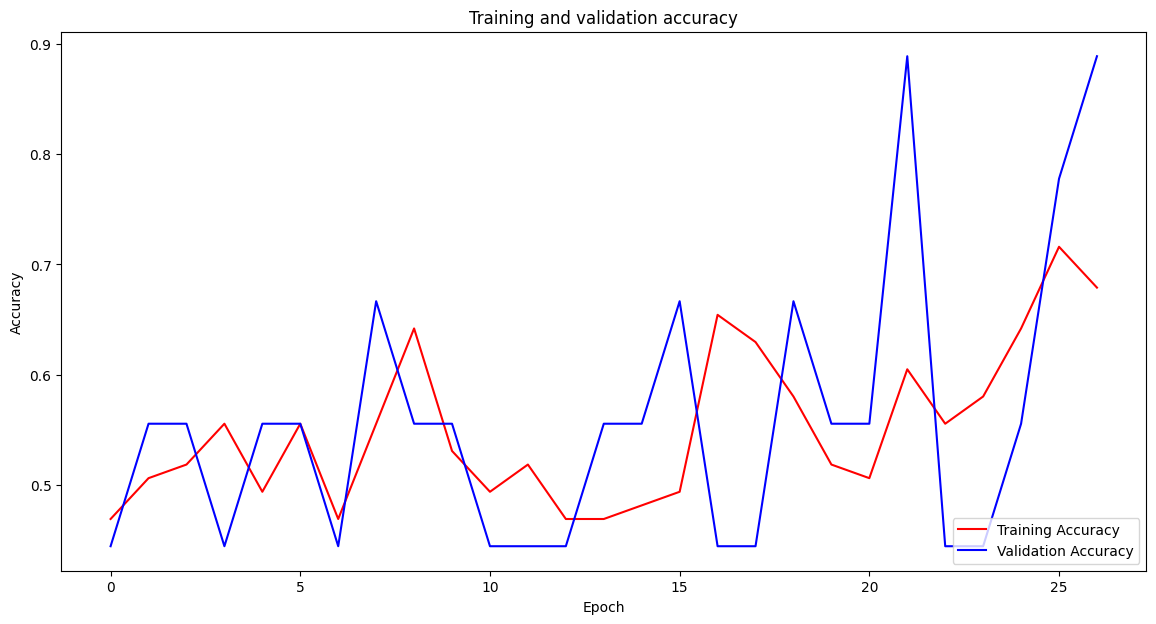

In [14]:
#model.save('LumpyDisease.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

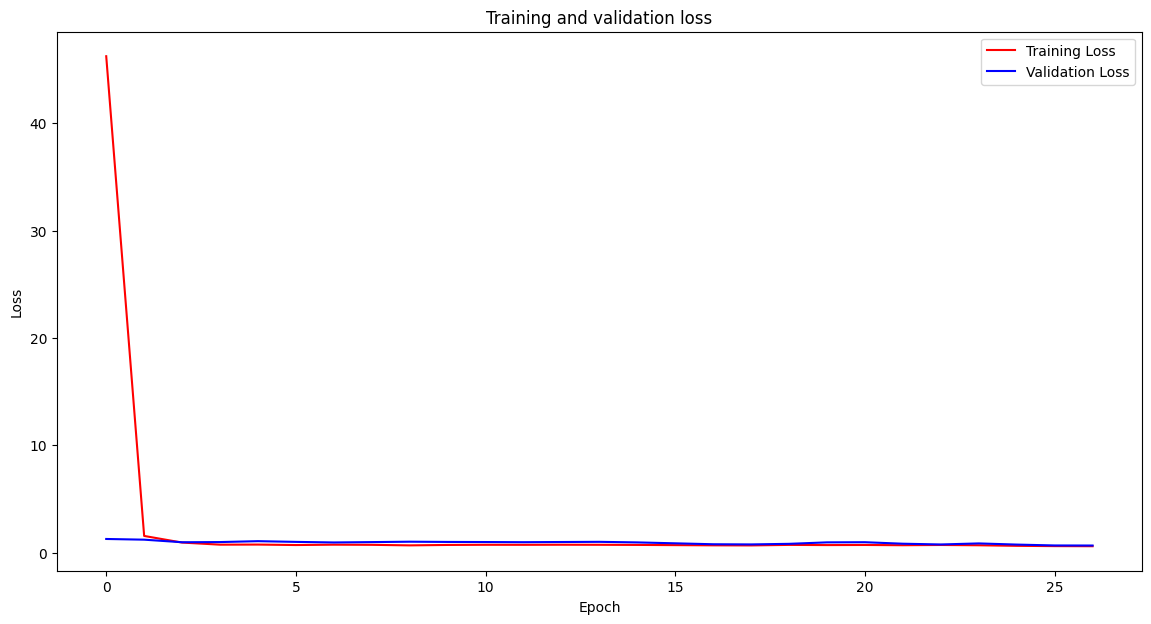

In [15]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [16]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

1/1 [==============================] - 1s 999ms/step


In [17]:
y_test.shape
pred.shape

(10,)

In [18]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 90.00%


In [19]:
model.save('/content/drive/MyDrive/LumpyDisease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Final Executable Code

In [23]:
from keras.models import load_model

model_path = '/content/drive/MyDrive/LumpyDisease_model.h5'
model = load_model(model_path)

In [35]:
import os
print(os.listdir('/content/'))


['.config', 'drive', 'sample_data']


In [37]:
import cv2

img = cv2.imread('/content/drive/MyDrive/img1435.jpg')

if img is None:
    print("Error: Image not loaded. Check if the file path is correct.")
else:
    print("Image loaded successfully.")


Image loaded successfully.


In [39]:
img_resized = cv2.resize(img, (150, 150))


In [40]:
import numpy as np

img_array = np.array(img_resized)
img_array = img_array.reshape(1, 150, 150, 3)


In [41]:
a = model.predict(img_array)


1/1 [==============================] - 1s 739ms/step


In [43]:
if a[0][0] == 0:
    print('Probably a Healthy cow')
else:
    print('Probably an Infected cow')

Probably an Infected cow
